# Data Loading

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
import pandas as pd

dataset = r'C:\Datasets\aihumantext\AI_Human.csv'

df = pd.read_csv(dataset)

df.head()

,text,generated
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0


In [ ]:
df.sample(1)['text'].values[0]

'Dear Principal Of SCHOOL_NAME,\n\nI am student at SCHOOL_NAME and I believe that we should be allowed Policy 1. Policy 1 is allowing students to be able to use there phones for lunch and other free time. I think this because teens and kids these days have there phones on them (in there pocket or coat) 24/7! We love to text and calling people.\n\nBut I agree that we should not be allowed cell phones in class. When you are in a classroom it is the teachers job to make sure you learn. Not to text or be on the phone with someone. But it is very hard to not be able to use you phone almost all day. We have breaks in school like lunch and advisory. I think we should be allowed to use them then. Lunch you are eating and talking to friends, and sometimes you run out of subjects to talk about. So you could use your phone and text one of your friends from another school or a family member. It could be distracting during advisory because advisory is time to go see teachers if you have to retake a

# Data Exploration

## Preprocessing

In [ ]:
print((len(df)))

487235


## Visusalisation

### AI Generated Text

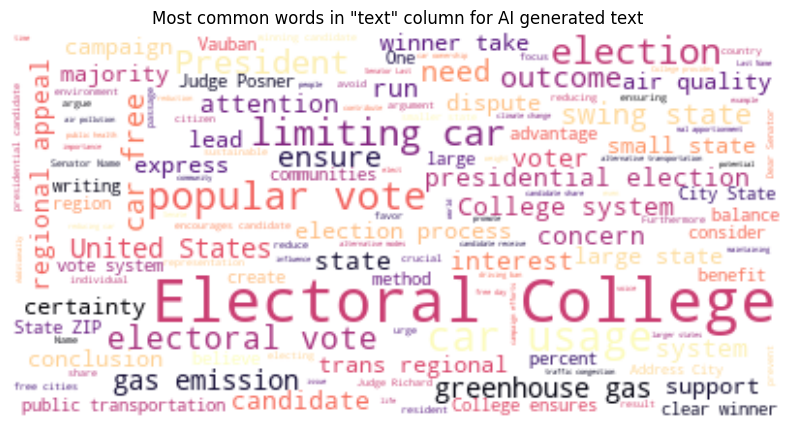

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all reviews into one big text and create a cloud to see which words are most common in these reviews.
def show_wordcloud(data, title):
    text = ' '.join(data.astype(str).tolist())
    wordcloud = WordCloud(max_words=200, colormap='magma', background_color='white').generate(text)

    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

ai_text = df[df['generated'] == 1]

# Word cloud for 'text' column
show_wordcloud(ai_text['text'].iloc[:1000], 'Most common words in "text" column for AI generated text')

In [ ]:
print(len(ai_text))

181438


### Human generated text

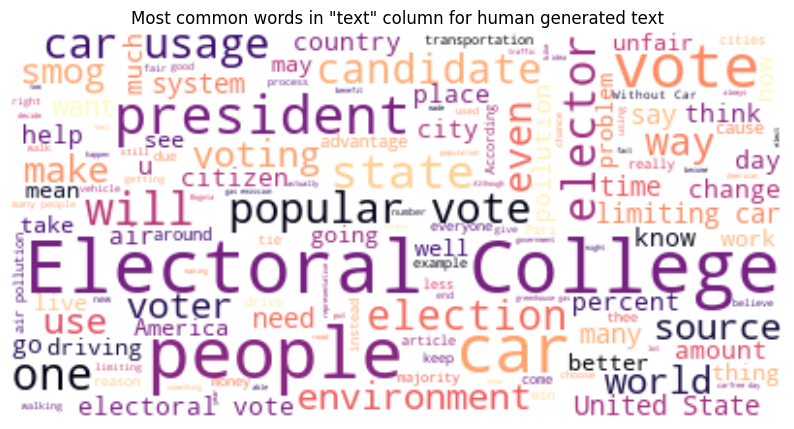

In [ ]:
human_text = df[df['generated'] == 0]

# Word cloud for 'text' column
show_wordcloud(human_text['text'].iloc[:1000], 'Most common words in "text" column for human generated text')

In [ ]:
print(len(human_text))

305797


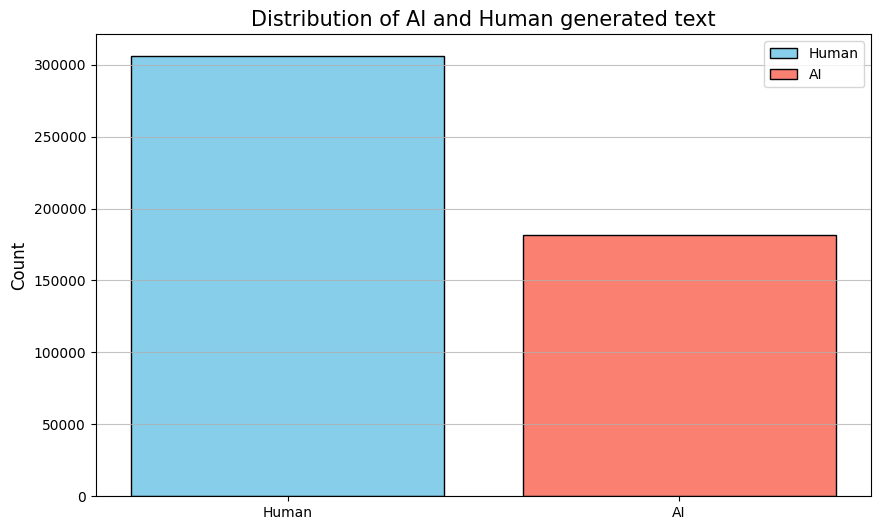

In [ ]:
# Increase the size of the plot
plt.figure(figsize=(10, 6))

# Separate data
human = df[df['generated'] == 0]
ai = df[df['generated'] == 1]

# Plot the histogram for human
plt.hist(human['generated'], bins=1, color='skyblue', edgecolor='black', rwidth=0.8, label='Human')

# Plot the histogram for AI
plt.hist(ai['generated'], bins=1, color='salmon', edgecolor='black', rwidth=0.8, label='AI')

# Add grid lines
plt.grid(axis='y', alpha=0.75)

# Add title and labels
plt.title('Distribution of AI and Human generated text', fontsize=15)
plt.ylabel('Count', fontsize=12)

# Change x-tick labels
plt.xticks([0, 1], ['Human', 'AI'])

# Add legend
plt.legend()

# Show the plot
plt.show()

C:\Users\CL-11\AppData\Local\Temp\ipykernel_8956\355624233.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ai_text['text_length'] = ai_text['text'].apply(len)
C:\Users\CL-11\AppData\Local\Temp\ipykernel_8956\355624233.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  human_text['text_length'] = human_text['text'].apply(len)


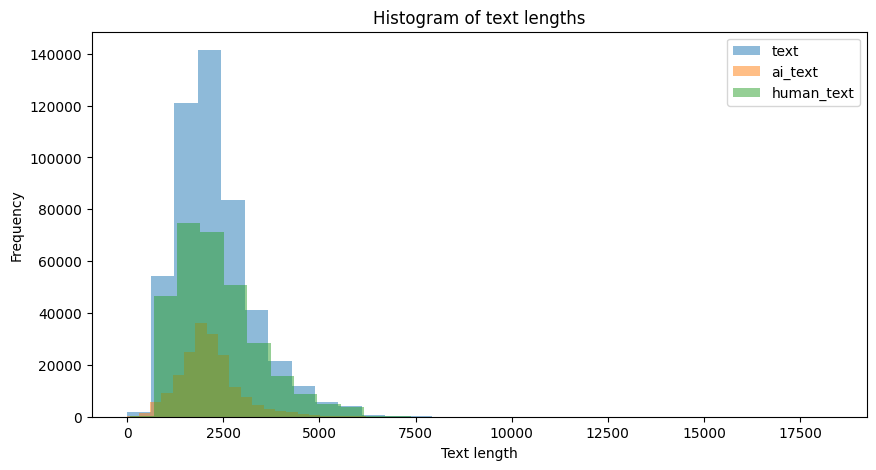

In [ ]:
# Histogram of text lengths
df['text_length'] = df['text'].apply(len)
ai_text['text_length'] = ai_text['text'].apply(len)
human_text['text_length'] = human_text['text'].apply(len)

plt.figure(figsize=(10, 5))
plt.hist(df['text_length'], bins=30, alpha=0.5, label='text')
plt.hist(ai_text['text_length'], bins=30, alpha=0.5, label='ai_text')
plt.hist(human_text['text_length'], bins=30, alpha=0.5, label='human_text')
plt.title('Histogram of text lengths')
plt.xlabel('Text length')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

# Data Processing

## Preprocessing

In [ ]:
temp_df = df # just incase I want to revert some changes without processing it all over again
df = temp_df

In [ ]:
df_ai = df[df['generated'] == 1]
df_human = df[df['generated'] == 0]

df = pd.concat([df_ai, df_human])

df['generated'] = df['generated'].apply(lambda x: int(x))
df['text'] = df['text'].apply(lambda x: str(x).lower())

print(df)

                                                     text  generated  \
704     this essay will analyze, discuss and prove one...          1   
740     i strongly believe that the electoral college ...          1   
1262    limiting car use causes pollution, increases c...          1   
1378    car-free cities have become a subject of incre...          1   
1379    car free cities  car-free cities, a concept ga...          1   
...                                                   ...        ...   
487229  in "the challenge of exploring venus" the auth...          0   
487230  tie face on mars is really just a big misunder...          0   
487231  the whole purpose of democracy is to create a ...          0   
487233  i dfn't agree with this decision because a lft...          0   
487234  richard non, jimmy carter, and bob dole and ot...          0   

        text_length  
704            1356  
740            1500  
1262           1797  
1378           4091  
1379           3757  
...

In [ ]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

class PreprocessedDataFrame(pd.DataFrame):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self._remove_tags()
        self._remove_punctuation()
        self._remove_stopwords()

    def _remove_tags(self):
        tags = ['\n', '\'']
        for tag in tags:
            self['text'] = self['text'].replace(tag, '')

    def _remove_punctuation(self):
        self['text'] = self['text'].apply(lambda text: ''.join([x for x in text if x not in string.punctuation]))

    def _remove_stopwords(self):
        stop_words = set(stopwords.words('english'))
        self['text'] = self['text'].apply(lambda text: ' '.join([word for word in nltk.word_tokenize(text) if word.lower() not in stop_words]))

# Usage:
df = PreprocessedDataFrame(df.sample(10000))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CL-11\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df.head()

,text,generated,text_length
320644,becoming seagoing cowboy means would take care...,0,2583
262246,well studentname think principals allow studen...,0,859
80200,face mars subject much intrigue enthusiasts sc...,1,5299
70214,school stressful place teens nowadays look goo...,0,2736
57291,autor suggestds explore venus personally think...,0,1786


C:\Users\CL-11\AppData\Local\Temp\ipykernel_8956\1822988460.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(frequencies), palette="viridis")


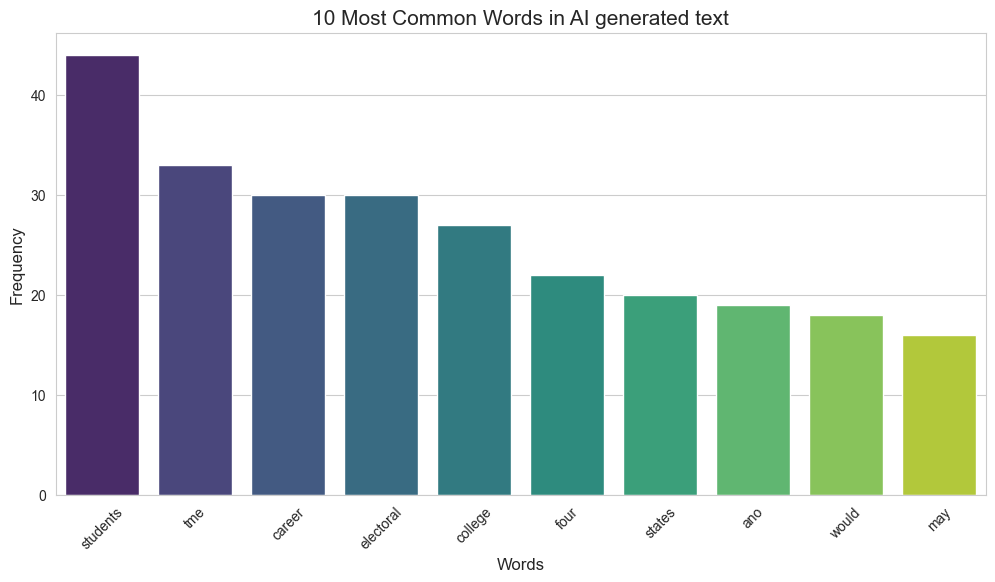

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import nltk
import seaborn as sns

# Assuming 'df' is your DataFrame and 'text' is the column with the text
words = nltk.word_tokenize(' '.join(df[df['generated'] == 1].sample(10)['text']))

# Get the 10 most common words
word_freq = Counter(words)
common_words = word_freq.most_common(10)

# Create bar plot
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
words, frequencies = zip(*common_words)
sns.barplot(x=list(words), y=list(frequencies), palette="viridis")
plt.title('10 Most Common Words in AI generated text', fontsize=15)
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.show()

C:\Users\CL-11\AppData\Local\Temp\ipykernel_8956\1781466279.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(frequencies), palette="viridis")


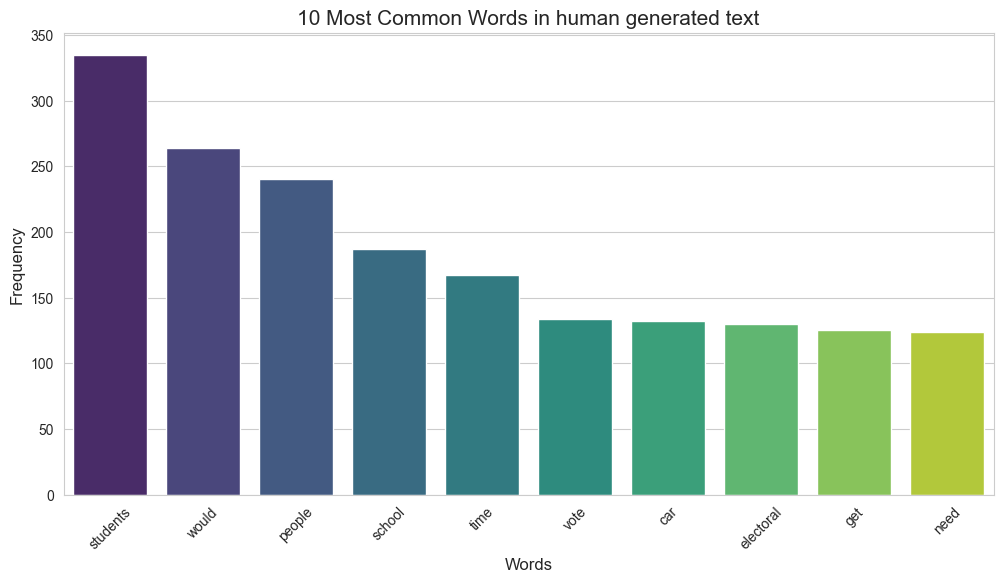

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import nltk
import seaborn as sns

# Assuming 'df' is your DataFrame and 'text' is the column with the text
words = nltk.word_tokenize(' '.join(df[df['generated'] == 0].sample(100)['text']))

# Get the 10 most common words
word_freq = Counter(words)
common_words = word_freq.most_common(10)

# Create bar plot
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
words, frequencies = zip(*common_words)
sns.barplot(x=list(words), y=list(frequencies), palette="viridis")
plt.title('10 Most Common Words in human generated text', fontsize=15)
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.show()

## Prep

In [ ]:
from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test= train_test_split(df['text'],df['generated'],test_size=0.4,random_state=56,stratify= df['generated'])
#X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=56, stratify=y_test)

y=df['generated']
X=df['text']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
print(len(X_train))
print(len(y_train))

7000
7000


In [ ]:
max_length = max(len(sentence.split()) for sentence in X_train)
max_length

737

In [ ]:
max(len(sentence.split()) for sentence in X_val)

607

In [ ]:
max(len(sentence.split()) for sentence in X_test)

684

In [ ]:
from collections import Counter
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset
from torch import nn
import torch.nn.functional as F

class SimpleTokenizer:
    def __init__(self):
        self.word_index = {'[UNK]': 0} 
        self.index_word = {0: '[UNK]'}
        self.vocab_size = 1 

    def fit_on_texts(self, texts):
        word_count = Counter(word for text in texts for word in text.split())
        for word, _ in word_count.items():
            if word not in self.word_index:
                self.word_index[word] = self.vocab_size
                self.index_word[self.vocab_size] = word
                self.vocab_size += 1

    def texts_to_sequences(self, texts):
        return [[self.word_index.get(word, 0) for word in text.split()] if text.split() else [0] for text in texts]

def prepare_data(sequences, word_features, max_length=None):
    if max_length is None:
        max_length = max(len(seq) for seq in sequences)
    lengths = [min(len(seq), max_length) for seq in sequences]
    padded_sequences = np.zeros((len(sequences), max_length), dtype=int)
    for i, seq in enumerate(sequences):
        padded_sequences[i, :lengths[i]] = seq[:max_length]
    return (torch.tensor(padded_sequences, dtype=torch.long), 
            torch.tensor(word_features, dtype=torch.float32), 
            torch.tensor(lengths, dtype=torch.long))

def prepare_data(sequences, word_features, max_length):
    padded_sequences = np.zeros((len(sequences), max_length), dtype=int)
    for i, seq in enumerate(sequences):
        end = min(len(seq), max_length) 
        padded_sequences[i, :end] = seq[:end]
    return (
        torch.tensor(padded_sequences, dtype=torch.long),
        torch.tensor(word_features, dtype=torch.float32),
        torch.tensor([min(len(seq), max_length) for seq in sequences], dtype=torch.long)
    )

    
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

def tokenize_text(text):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    return [token for token in tokens if token.isalpha() and token not in stop_words]

# Tokenize all texts and count word occurrences
all_words = [word for text in df['text'] for word in tokenize_text(text)]
word_counts = Counter(all_words)

# Select the top 500 most common words as features
top_words = [word for word, _ in word_counts.most_common(500)]

def create_word_features(text):
    tokens = tokenize_text(text)
    return [1 if word in tokens else 0 for word in top_words]

tokenizer = SimpleTokenizer()
tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train)
word_features_train = [create_word_features(text) for text in X_train]
X_train_tensor, word_features_train_tensor, lengths = prepare_data(sequences, word_features_train, max_length)

# Create tensor for labels
y_train_tensor = torch.tensor(y_train.to_numpy(), dtype=torch.float32)

# Create a dataset and DataLoader
train_dataset = TensorDataset(X_train_tensor, word_features_train_tensor, lengths, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Prepare validation data
sequences_valid = tokenizer.texts_to_sequences(X_val)
word_features_valid = [create_word_features(text) for text in X_val]
X_valid_tensor, word_features_valid_tensor, lengths_valid = prepare_data(sequences_valid, word_features_valid, max_length)
y_valid_tensor = torch.tensor(y_val.to_numpy(), dtype=torch.float32)
valid_dataset = TensorDataset(X_valid_tensor, word_features_valid_tensor, lengths_valid, y_valid_tensor)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)

In [ ]:
max_length = max(len(seq) for seq in sequences)  # Calculate from training data
X_train_tensor, word_features_train_tensor, lengths_train = prepare_data(sequences, word_features_train, max_length)
X_valid_tensor, word_features_valid_tensor, lengths_valid = prepare_data(sequences_valid, word_features_valid, max_length)

In [ ]:
# Print original and padded lengths
print("Original lengths:", [len(seq) for seq in sequences[:5]])  # First five sequence lengths before padding
print("Padded lengths:", lengths_train[:5].tolist())  # After padding

# Print the actual padded sequences
print("Sample padded sequences:", X_train_tensor[:5])

Original lengths: [181, 342, 217, 285, 201]
Padded lengths: [181, 342, 217, 285, 201]
Sample padded sequences: tensor([[  1,   2,   3,  ...,   0,   0,   0],
        [154, 155, 156,  ...,   0,   0,   0],
        [292, 293,  58,  ...,   0,   0,   0],
        [ 22, 457, 458,  ...,   0,   0,   0],
        [185, 534, 535,  ...,   0,   0,   0]])


In [ ]:
vocab_size = tokenizer.vocab_size
print("Vocabulary size:", vocab_size)

Vocabulary size: 32850


In [ ]:
# Iterate over the validation DataLoader
for i, (sequences, word_features, lengths, labels) in enumerate(valid_loader):
    # Check if there are any sequences with a length of 0
    if (lengths == 0).any():
        print(f"Batch {i} contains one or more sequences with a length of 0.")

In [ ]:
print("Maximum sequence length for training:", max_length)
print("Training Data Shape:", X_train_tensor.shape)
print("Validation Data Shape:", X_valid_tensor.shape)

Maximum sequence length for training: 737
Training Data Shape: torch.Size([7000, 737])
Validation Data Shape: torch.Size([1500, 737])


# Text-CNN

In [ ]:
from tqdm import tqdm

train_loss_history = []
valid_loss_history = []

num_classes = 1
MAX_SEQUENCE_LENGTH = max_length

class TextCNN(nn.Module):
    def __init__(self, vocab_size, embed_size, num_classes=1, max_seq_length=MAX_SEQUENCE_LENGTH):
        super(TextCNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.conv1 = nn.Conv1d(embed_size, 128, kernel_size=4, padding='same')
        self.pool1 = nn.MaxPool1d(kernel_size=2)
        self.conv2 = nn.Conv1d(128, 64, kernel_size=4, padding='same')
        self.pool2 = nn.MaxPool1d(kernel_size=2)
        self.conv3 = nn.Conv1d(64, 32, kernel_size=4, padding='same')
        self.pool3 = nn.MaxPool1d(kernel_size=2)
        self.flatten = nn.Flatten()

        output_length = max_seq_length // (2**3) 
        flattened_output_size = 32 * output_length

        self.fc1 = nn.Linear(flattened_output_size, 256)
        self.fc2 = nn.Linear(256, num_classes)
        self.output_act = nn.Sigmoid()

    def forward(self, x):
        x = self.embedding(x)
        x = x.permute(0, 2, 1)
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = F.relu(self.conv3(x))
        x = self.pool3(x)
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        if num_classes == 1:
            x = self.output_act(x)
        return x
    
vocab_size = tokenizer.vocab_size  # Adjust as necessary
embed_size = 300
model = TextCNN(vocab_size, embed_size).to(device) 
print(model)

def train(ckpts_path, model, train_loader, val_loader, criterion, optimizer, num_epochs=10):

    try:
        checkpoint = torch.load(f'{ckpts_path}/best_text_cnn1_classifier.pth')
        model.load_state_dict(checkpoint['model_state_dict'])
        train_loss_history = checkpoint['train_loss_history']
        valid_loss_history = checkpoint['valid_loss_history']
        best_loss = min(valid_loss_history)
        print("Found checkpoint.")
    except:
        print("Found no checkpoint.")
        best_loss = float('inf')
        train_loss_history = []
        valid_loss_history = []

    for epoch in range(num_epochs):
        model.train() 
        running_loss = 0.0
        for sequences, word_features, lengths, labels in tqdm(train_loader):
            sequences, word_features, labels = sequences.to(device), word_features.to(device), labels.to(device)
            optimizer.zero_grad()  
            outputs = model(sequences)
            loss = criterion(outputs.squeeze(), labels.float()) 
            loss.backward()
            optimizer.step() 
            running_loss += loss.item() * sequences.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        train_loss_history.append(epoch_loss)
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')

        model.eval() 
        val_running_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for sequences, word_features, lengths, labels in tqdm(val_loader):
                sequences, word_features, labels = sequences.to(device), word_features.to(device), labels.to(device)
                outputs = model(sequences)
                loss = criterion(outputs.squeeze(), labels.float())
                val_running_loss += loss.item() * sequences.size(0)
                predicted = (outputs.squeeze() >= 0.5).float()
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        val_loss = val_running_loss / len(val_loader.dataset)
        valid_loss_history.append(val_loss)
        accuracy = 100 * correct / total
        print(f'Validation Loss: {val_loss:.4f}, Accuracy: {accuracy:.2f}%')

        if val_loss < best_loss:
            best_loss = val_loss
            torch.save({
                'model_state_dict': model.state_dict(),
                'train_loss_history': train_loss_history,
                'valid_loss_history': valid_loss_history
            }, f'{ckpts_path}/best_text_cnn1_classifier.pth')

        try:
            torch.save({
            'model_state_dict': model.state_dict(),
            'train_loss_history': train_loss_history,
            'valid_loss_history': valid_loss_history
        }, f'{ckpts_path}/last_text_cnn1_classifier.pth')
        except:
            pass

    print('Finished Training')

    return train_loss_history, valid_loss_history

    
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.BCELoss()

train_loss_history, valid_loss_history = train("checkpoints", model, train_loader, valid_loader, criterion, optimizer, num_epochs=10)

TextCNN(
  (embedding): Embedding(32850, 300)
  (conv1): Conv1d(300, 128, kernel_size=(4,), stride=(1,), padding=same)
  (pool1): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv1d(128, 64, kernel_size=(4,), stride=(1,), padding=same)
  (pool2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv1d(64, 32, kernel_size=(4,), stride=(1,), padding=same)
  (pool3): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=2944, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=1, bias=True)
  (output_act): Sigmoid()
)


c:\Users\CL-11\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Found no checkpoint.


  0%|          | 0/219 [00:00<?, ?it/s]c:\Users\CL-11\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\conv.py:306: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at ..\aten\src\ATen\native\Convolution.cpp:1032.)
  return F.conv1d(input, weight, bias, self.stride,
 99%|█████████▊| 216/219 [00:02<00:00, 93.93it/s]c:\Users\CL-11\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\conv.py:306: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ..\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv1d(input, weight, bias, self.stride,
100%|██████████| 219/219 [00:02<00:00, 74.71it/s]


Epoch 1/10, Loss: 0.5030


100%|██████████| 47/47 [00:00<00:00, 345.70it/s]


Validation Loss: 0.2266, Accuracy: 91.47%


100%|██████████| 219/219 [00:02<00:00, 94.46it/s]


Epoch 2/10, Loss: 0.1832


100%|██████████| 47/47 [00:00<00:00, 359.16it/s]


Validation Loss: 0.1440, Accuracy: 94.73%


100%|██████████| 219/219 [00:02<00:00, 91.73it/s]


Epoch 3/10, Loss: 0.0941


100%|██████████| 47/47 [00:00<00:00, 354.68it/s]


Validation Loss: 0.1190, Accuracy: 95.93%


100%|██████████| 219/219 [00:02<00:00, 90.50it/s]


Epoch 4/10, Loss: 0.0583


100%|██████████| 47/47 [00:00<00:00, 354.38it/s]


Validation Loss: 0.1067, Accuracy: 96.60%


100%|██████████| 219/219 [00:02<00:00, 93.14it/s]


Epoch 5/10, Loss: 0.0367


100%|██████████| 47/47 [00:00<00:00, 355.98it/s]


Validation Loss: 0.1147, Accuracy: 96.40%


100%|██████████| 219/219 [00:02<00:00, 93.03it/s]


Epoch 6/10, Loss: 0.0170


100%|██████████| 47/47 [00:00<00:00, 364.49it/s]


Validation Loss: 0.1044, Accuracy: 96.87%


100%|██████████| 219/219 [00:02<00:00, 91.08it/s]


Epoch 7/10, Loss: 0.0113


100%|██████████| 47/47 [00:00<00:00, 357.48it/s]


Validation Loss: 0.1222, Accuracy: 96.47%


100%|██████████| 219/219 [00:02<00:00, 90.18it/s]


Epoch 8/10, Loss: 0.0048


100%|██████████| 47/47 [00:00<00:00, 346.81it/s]


Validation Loss: 0.1483, Accuracy: 96.07%


100%|██████████| 219/219 [00:02<00:00, 91.55it/s]


Epoch 9/10, Loss: 0.0017


100%|██████████| 47/47 [00:00<00:00, 355.52it/s]


Validation Loss: 0.1370, Accuracy: 96.53%


100%|██████████| 219/219 [00:02<00:00, 93.27it/s]


Epoch 10/10, Loss: 0.0007


100%|██████████| 47/47 [00:00<00:00, 368.24it/s]

Validation Loss: 0.1404, Accuracy: 96.53%
Finished Training


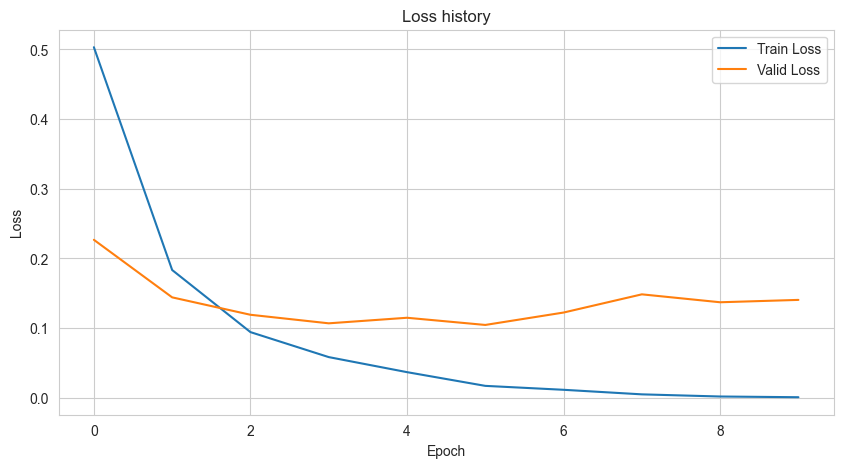

In [ ]:
# Plot loss history
plt.figure(figsize=(10, 5))
plt.plot(train_loss_history, label='Train Loss')
plt.plot(valid_loss_history, label='Valid Loss')
plt.title('Loss history')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
def test(model, test_loader, criterion):
    model.eval()  # Set model to evaluation mode
    running_loss = 0.0
    correct_preds = 0
    total_samples = 0
    y_true = []  # Store all true labels
    all_predictions = []  # Store all predictions
    with torch.no_grad():
        for sequences, word_features, lengths, labels in tqdm(test_loader):
            sequences, word_features, labels = sequences.to(device), word_features.to(device), labels.to(device)
            outputs = model(sequences)
            loss = criterion(outputs.squeeze(), labels.float())
            running_loss += loss.item() * sequences.size(0)
            total_samples += sequences.size(0)
            predictions = (outputs.squeeze() > 0.5).long()  # Get predictions
            correct_preds += predictions.eq(labels).sum().item()
            y_true.extend(labels.tolist())
            all_predictions.extend(predictions.tolist())  # Add predictions to list

    test_loss = running_loss / total_samples
    accuracy = correct_preds / total_samples
    print(f'Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.4f}')
    print(f'Predictions: {all_predictions}')  # Print all predictions

    return y_true, all_predictions
y_true, y_pred = test(model, valid_loader, criterion)

100%|██████████| 47/47 [00:00<00:00, 339.59it/s]

Test Loss: 0.1404, Accuracy: 0.9653
Predictions: [0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       926
           1       0.94      0.97      0.96       574

    accuracy                           0.97      1500
   macro avg       0.96      0.97      0.96      1500
weighted avg       0.97      0.97      0.97      1500



# Other Models

## SVC

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [ ]:
pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer()),  # Step 1: CountVectorizer
    ('tfidf_transformer', TfidfTransformer()),  # Step 2: TF-IDF Transformer
    ('naive_bayes', MultinomialNB())])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('count_vectorizer', CountVectorizer()),
                ('tfidf_transformer', TfidfTransformer()),
                ('naive_bayes', MultinomialNB())])

In [ ]:
y_pred= pipeline.predict(X_test)

In [ ]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       947
           1       0.99      0.78      0.87       553

    accuracy                           0.91      1500
   macro avg       0.94      0.89      0.90      1500
weighted avg       0.92      0.91      0.91      1500



# SciBERT